In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# get data/results path
data_path = '../Data/Cluster_Results/'

result_directory = '../Data/Cluster_Results'
if not os.path.exists(result_directory):
    os.makedirs(result_directory)

In [3]:
import glob

# Get a list of all CSV files in the data path
csv_files = glob.glob(os.path.join(data_path, "*.csv"))

# Read each CSV file and concatenate them into a single dataframe
df_list = [pd.read_csv(file) for file in csv_files]
big_df = pd.concat(df_list, ignore_index=True)

big_df.to_csv(os.path.join(result_directory, 'all_clustered_results_cleaned.csv'), index=False)

/var/folders/z2/q1qv_y2d5wq14w63qr1l_2rh0000gn/T/ipykernel_38837/3464767569.py:7: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list = [pd.read_csv(file) for file in csv_files]


In [4]:
big_df.head()

,Unnamed: 0,id,mother,frames,daughters,new_pole,old_pole,edges,length,width,...,x,y,IntDen,series,Autoinducer,gene,new_y,new_x,Group,cluster
0,1645323,7,NaN,0,NaN,[1149 1263],[1120 1268],NaN,43.553173,10.350284,...,1134.5,1265.5,92354.366925,30,Without,lasI,1169.5,1265.5,1,78.0
1,1645324,7,NaN,1,20.0,[1132 1272],[1120 1273],NaN,23.000000,9.000000,...,1126.0,1272.5,42108.108808,30,Without,lasI,1178.0,1272.5,1,78.0
2,1645325,7,NaN,2,NaN,[1126 1271],[1112 1272],NaN,26.000000,9.000000,...,1119.0,1271.5,52836.539301,30,Without,lasI,1185.0,1271.5,1,78.0
3,1645326,7,NaN,3,NaN,[1135 1277],[1111 1277],NaN,32.000000,9.000000,...,1123.0,1277.0,65091.816726,30,Without,lasI,1181.0,1277.0,1,78.0
4,1645327,7,NaN,4,NaN,[1134 1277],[1105 1275],NaN,38.216839,10.241114,...,1119.5,1276.0,81007.478754,30,Without,lasI,1184.5,1276.0,1,78.0


In [ ]:
# read data
filename = os.path.join(data_path, "RpsL_without_delta_results_clustered.csv")
df = pd.read_csv(filename)

In [ ]:
df.cluster.unique()

In [ ]:
df.groupby('series').cluster.unique()

/var/folders/z2/q1qv_y2d5wq14w63qr1l_2rh0000gn/T/ipykernel_76358/1934023396.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='best')
/var/folders/z2/q1qv_y2d5wq14w63qr1l_2rh0000gn/T/ipykernel_76358/1934023396.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='best')
/var/folders/z2/q1qv_y2d5wq14w63qr1l_2rh0000gn/T/ipykernel_76358/1934023396.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='best')
/var/folders/z2/q1qv_y2d5wq14w63qr1l_2rh0000gn/T/ipykernel_76358/1934023396.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose l

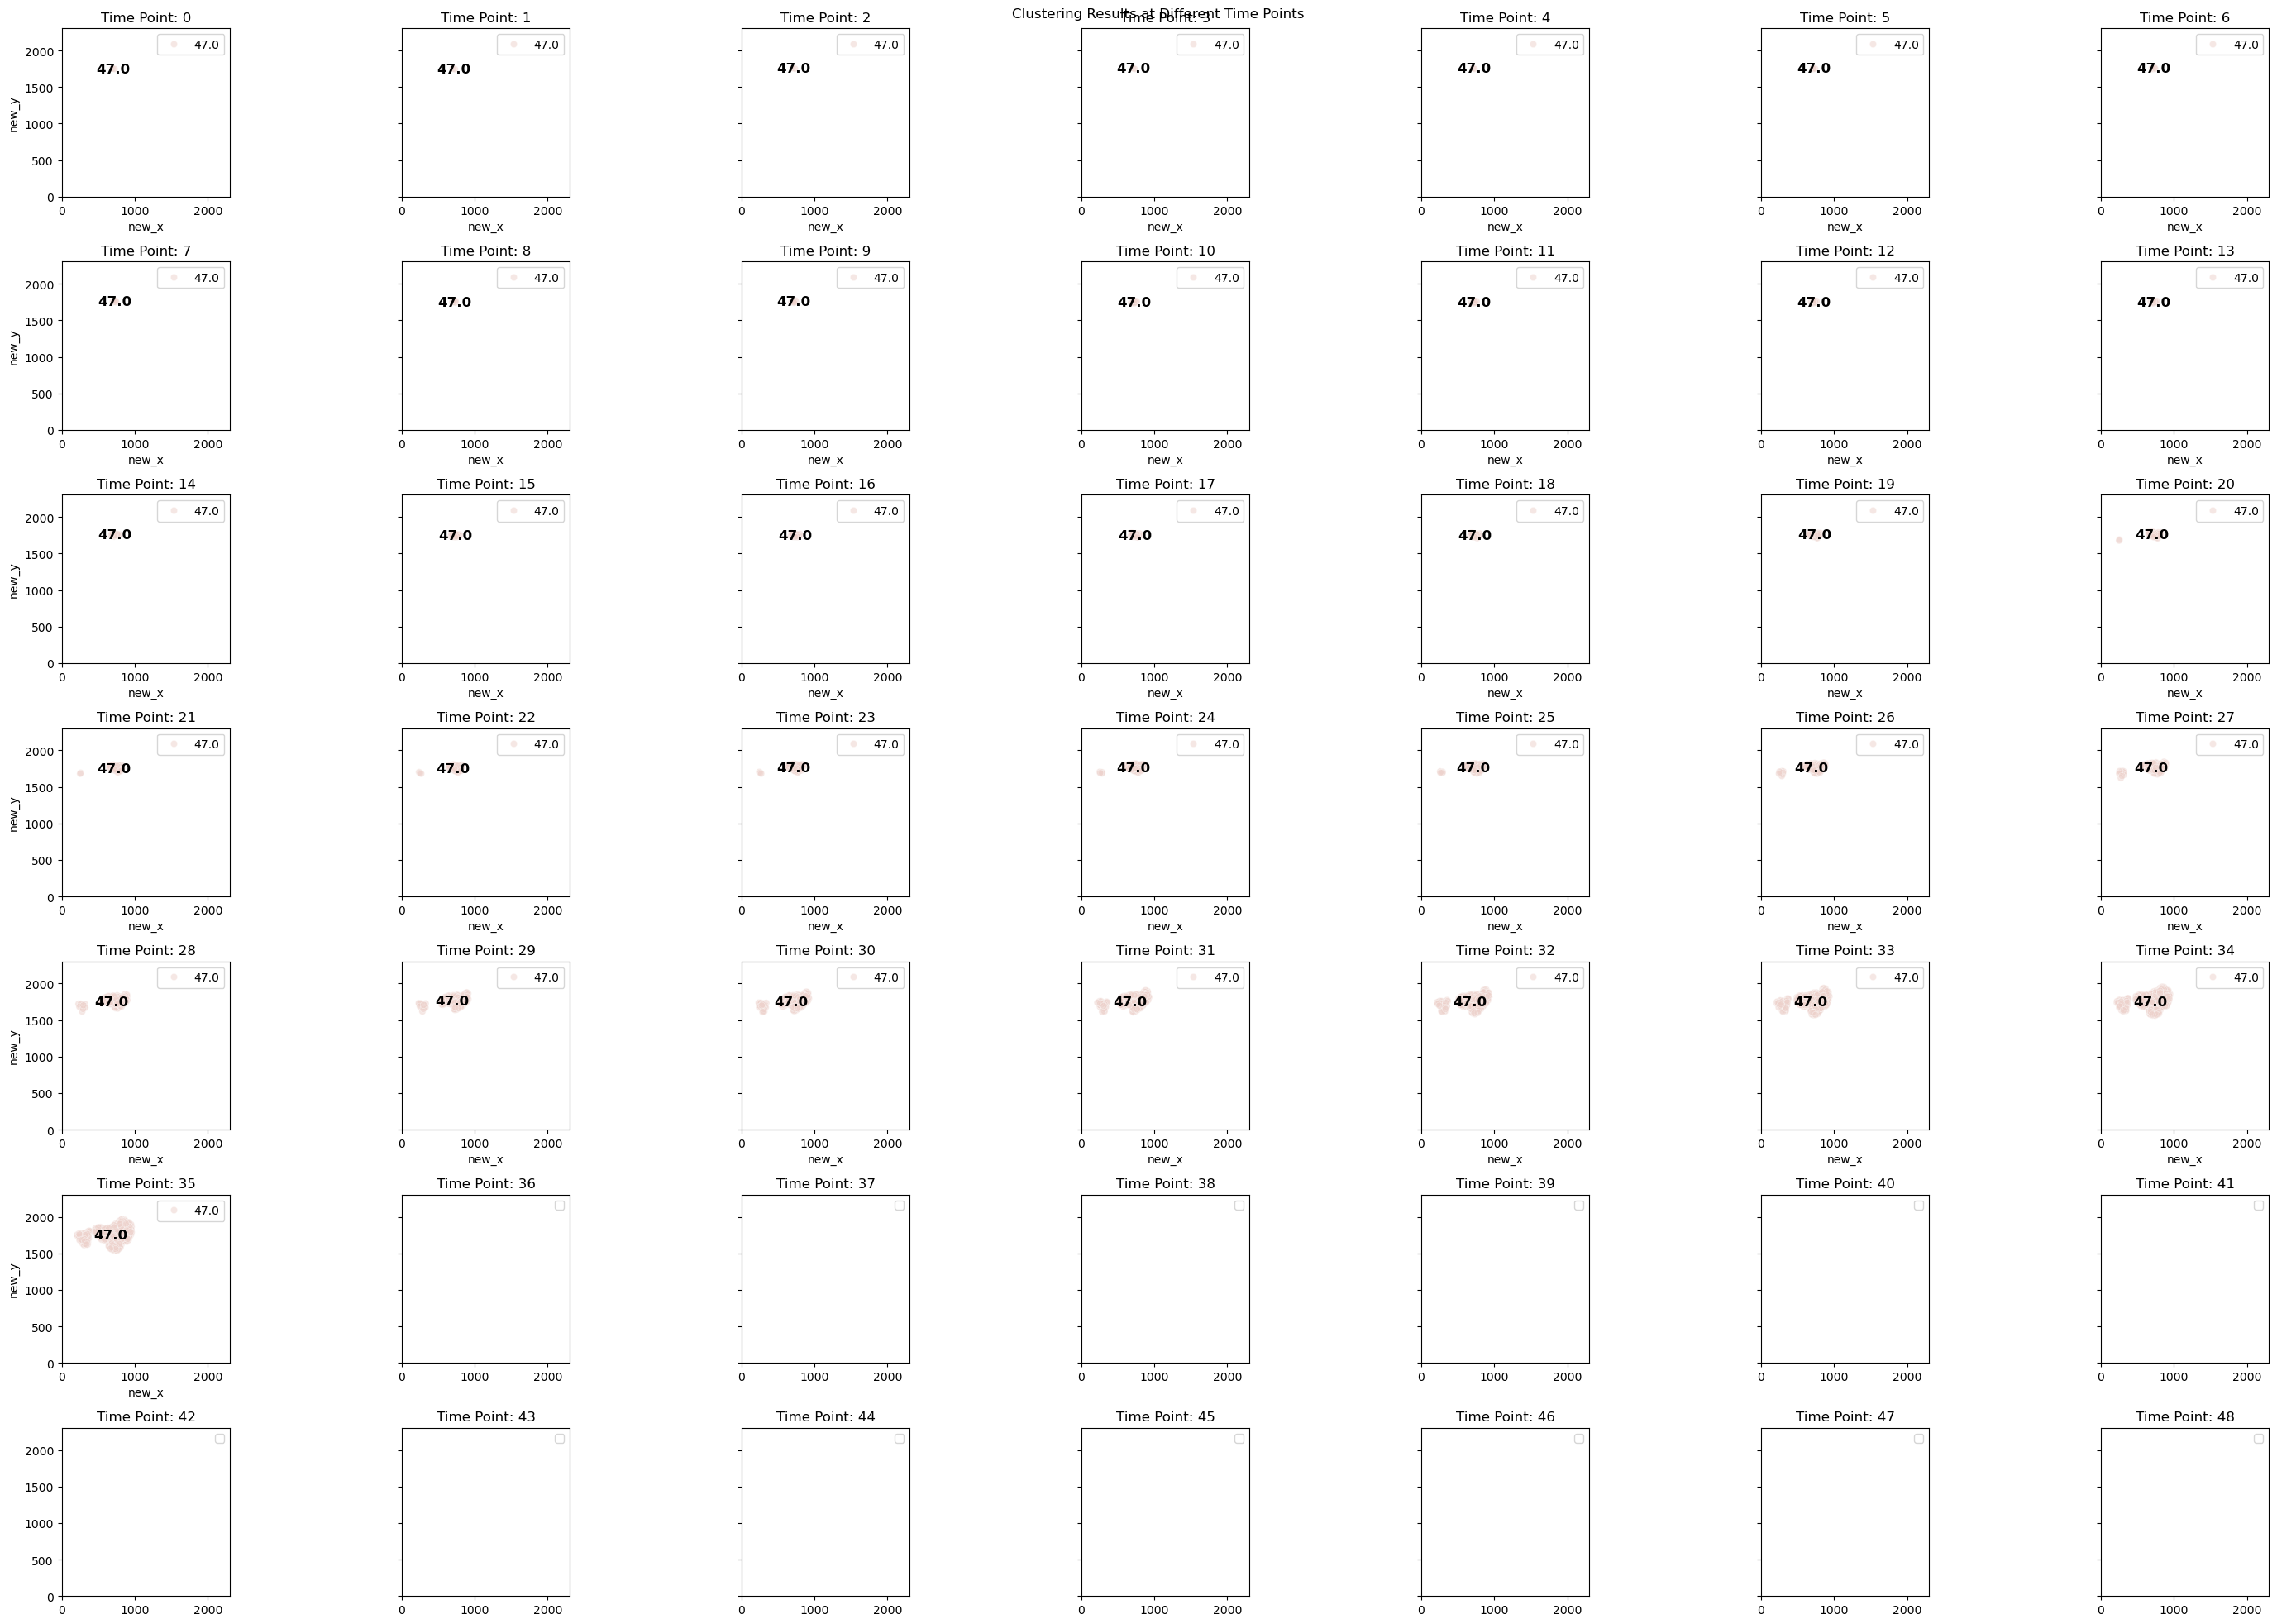

In [11]:
df_test = df[df.cluster == 47]

# define the checking datafrane, it should be either df_test or df_xx
df_check = df_test

# 选择你想展示的时间点 (frames)
t_snap = range(0, 49, 1)

# 过滤 DataFrame 只保留选定的时间点
df_filtered = df_check[df_check['frames'].isin(t_snap)]

# 确定子图的行数和列数
num_rows = 7
num_cols = 7

# 创建子图
fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, 20), sharey=True)

# 绘制每个子图
for i, frame in enumerate(t_snap):
    row, col = divmod(i, num_cols)
    ax = axes[row, col] 
    df_frame = df_filtered[df_filtered['frames'] == frame]
    sns.scatterplot(data=df_frame, x='new_x', y='new_y', hue='cluster', ax=ax, alpha=0.5)
    ax.set_xlim(0, 2304)  
    ax.set_ylim(0, 2304)  
    ax.set_aspect('equal', adjustable='box')  
    ax.set_title(f'Time Point: {frame}')
    ax.legend(loc='best')
    
    # 为每个簇标注一个数字，标注位置为簇的质心
    for group in df_frame['cluster'].unique():
        cluster_data = df_frame[df_frame['cluster'] == group]
        centroid_x = cluster_data['new_x'].mean()
        centroid_y = cluster_data['new_y'].mean()
        ax.text(centroid_x, centroid_y, str(group), color='black', fontsize=12, ha='center', va='center', weight='bold')

# 添加整体标题
plt.suptitle("Clustering Results at Different Time Points")

# 调整布局
plt.tight_layout()

# 显示图像
plt.show()


In [12]:
df.drop(df[(df.cluster == 47)&(df.new_x<400)].index, inplace=True)

df.to_csv(os.path.join(data_path, 'lasB_with_delta_results_clustered_cleaned_2.csv'), index=False)

## rpsL with

In [ ]:
# erase for cluster 21
index = df.loc[(df.cluster == 21) & (df.frames == 24)]['new_x'].idxmax()
df.loc[index]

In [ ]:
# erase for cluster 21
df.drop(df.loc[(df['cluster'] == 21) & (df['new_x'] > 1860) & (df['new_y'] > 2000)].index, inplace=True)

In [ ]:
# correct the mistake for series 8 and 9
df.drop(df.loc[(df['series'] == 9) & (df['cluster'].isin([30, 31, 32]))].index, inplace=True)

In [ ]:
# add for missing serie 8
df_series8 = pd.read_csv(os.path.join(data_path, "series8_cluster.csv"))
df = pd.concat([df, df_series8])

In [ ]:
df.to_csv(os.path.join(result_directory, "RpsL_with_delta_results_clustered_corrected.csv"), index=False)

## lasR without

In [ ]:
# eliminate cluster 54 becuase it's from two microscolonies merged together
df = df[df.cluster != 54]

In [ ]:
# erase for cluster 64
# erase for cluster 9
for _ in range(2):
    # Find the index of the maximum 'new_y' value for the specified cluster and frame
    index = df.loc[(df['cluster'] == 64) & (df['frames'] == 26), 'new_y'].idxmin()
    
    # Drop the row corresponding to the found index
    df.drop(index, inplace=True)
    
for _ in range(4):
    # Find the index of the maximum 'new_y' value for the specified cluster and frame
    index = df.loc[(df['cluster'] == 64) & (df['frames'] == 27), 'new_y'].idxmin()
    
    # Drop the row corresponding to the found index
    df.drop(index, inplace=True)

for _ in range(6):
    # Find the index of the maximum 'new_y' value for the specified cluster and frame
    index = df.loc[(df['cluster'] == 64) & (df['frames'] == 28), 'new_y'].idxmin()
    
    # Drop the row corresponding to the found index
    df.drop(index, inplace=True)

for _ in range(7):
    # Find the index of the maximum 'new_y' value for the specified cluster and frame
    index = df.loc[(df['cluster'] == 64) & (df['frames'] == 29), 'new_y'].idxmin()
    
    # Drop the row corresponding to the found index
    df.drop(index, inplace=True)

for _ in range(11):
    # Find the index of the maximum 'new_y' value for the specified cluster and frame
    index = df.loc[(df['cluster'] == 64) & (df['frames'] == 30), 'new_y'].idxmin()
    
    # Drop the row corresponding to the found index
    df.drop(index, inplace=True)

for _ in range(14):
    # Find the index of the maximum 'new_y' value for the specified cluster and frame
    index = df.loc[(df['cluster'] == 64) & (df['frames'] == 31), 'new_y'].idxmin()
    
    # Drop the row corresponding to the found index
    df.drop(index, inplace=True)

In [ ]:
df.to_csv(os.path.join(result_directory, 'lasR_without_delta_results_clustered_cleaned.csv'), index=False)

## lasR with

In [ ]:
# add the missing clusters
df.loc[df['series'] == 1, 'cluster'] = df['Group'].map({5: 2, 6: 3, 7: 4, 8: 5})

In [ ]:
# erase for cluster 3
df.drop(df.loc[(df['cluster'] == 3) & (df['new_x'] > 2000) & (df['new_y'] <500)].index, inplace=True)

In [ ]:
# erase for cluster 8
# Repeat the process four times
for _ in range(4):
    # Find the index of the maximum 'new_y' value for the specified cluster and frame
    index = df.loc[(df['cluster'] == 8) & (df['frames'] == 29), 'new_y'].idxmax()
    
    # Drop the row corresponding to the found index
    df.drop(index, inplace=True)

In [ ]:
# erase for cluster 9
for _ in range(2):
    # Find the index of the maximum 'new_y' value for the specified cluster and frame
    index = df.loc[(df['cluster'] == 9) & (df['frames'] == 22), 'new_x'].idxmax()
    
    # Drop the row corresponding to the found index
    df.drop(index, inplace=True)
    
for _ in range(3):
    # Find the index of the maximum 'new_y' value for the specified cluster and frame
    index = df.loc[(df['cluster'] == 9) & (df['frames'] == 23), 'new_x'].idxmax()
    
    # Drop the row corresponding to the found index
    df.drop(index, inplace=True)

for _ in range(5):
    # Find the index of the maximum 'new_y' value for the specified cluster and frame
    index = df.loc[(df['cluster'] == 9) & (df['frames'] == 24), 'new_x'].idxmax()
    
    # Drop the row corresponding to the found index
    df.drop(index, inplace=True)

for _ in range(6):
    # Find the index of the maximum 'new_y' value for the specified cluster and frame
    index = df.loc[(df['cluster'] == 9) & (df['frames'] == 25), 'new_x'].idxmax()
    
    # Drop the row corresponding to the found index
    df.drop(index, inplace=True)

for _ in range(10):
    # Find the index of the maximum 'new_y' value for the specified cluster and frame
    index = df.loc[(df['cluster'] == 9) & (df['frames'] == 26), 'new_x'].idxmax()
    
    # Drop the row corresponding to the found index
    df.drop(index, inplace=True)

In [ ]:
df.to_csv(os.path.join(result_directory, 'lasR_with_delta_results_clustered_cleaned.csv'), index=False)

## lasB with

In [8]:
# read data
data_path = '../Cluster_Results/corrected/'
filename = os.path.join(data_path, "lasB_with_delta_results_clustered_cleaned.csv")
df = pd.read_csv(filename)

In [ ]:
df.replace({'cluster': {np.nan: 47.5}}, inplace=True)

In [ ]:
df.to_csv(os.path.join(result_directory, "lasB_with_delta_results_clustered_cleaned.csv"), index=False)

## lasI without

In [ ]:
# erase for cluster 82
index = df.loc[(df['cluster'] == 82)&(df['frames'] == 30)]['new_y'].idxmin()
df.drop(index, inplace=True)

In [ ]:
# erase for cluster 84
df.drop(df.loc[(df['cluster'] == 84) & (df['new_y'] < 500)].index, inplace=True)

In [ ]:
df.to_csv(os.path.join(result_directory, "lasI_without_delta_results_clustered_cleaned.csv"), index=False)